Import libraries

In [1]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner

import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
!pip install folium
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [2]:
def top_venues(num_top_venues,data):
    for hood in data['Neighbourhood']:
        print("----"+hood+"----")
        temp = data[data['Neighbourhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

In [3]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [4]:
# create a new dataframe
def venues_to_dataframe(num_top_venues,columns,data,col):
    indicators = ['st', 'nd', 'rd']
    
    # create columns according to number of top venues
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))
    neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighbourhoods_venues_sorted[col] = data[col]   
    for ind in np.arange(data.shape[0]):
        neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data.iloc[ind, :], num_top_venues)
    return neighbourhoods_venues_sorted


In [5]:
def get_colors(n):
    return list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

In [6]:
neighbourhoods=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/neighbourhoods_london.csv',index_col=0)

In [7]:
neighbourhoods.shape

(563, 4)

Read borough_CLustering_05 csvfile

In [8]:

bc05=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/Borough_Cluster_05.csv',index_col=0)

In [9]:
for ii in bc05.columns:
    
        bc05[ii][0]=[x.strip() for x in eval(bc05[ii][0])]

In [10]:
London_neig_grouped=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/london_neig_grouped_CATEGORY_mean.csv', index_col=0)

In [11]:
London_neig_grouped.head()

,Neighbourhood,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
0,Abbey Wood,0.0,0.0,0.0,0.0,0.00,0.00,0.50,0.50,0.00
1,Acton,0.0,0.0,0.0,0.0,0.20,0.00,0.10,0.30,0.40
2,Addington,0.0,0.0,0.0,0.0,0.25,0.00,0.00,0.25,0.50
3,Addiscombe,0.0,0.0,0.0,0.0,0.50,0.00,0.25,0.25,0.00
4,Albany Park,0.0,0.0,0.0,0.0,0.25,0.25,0.00,0.25,0.25


In [12]:
bc051=pd.DataFrame(bc05['3'][0],columns=['Borough'])

In [13]:
pp=neighbourhoods.loc[neighbourhoods['Borough'].isin(bc051['Borough'].values)]['Neighbourhood']

In [14]:
London_neig_grouped_mean=London_neig_grouped.loc[London_neig_grouped['Neighbourhood'].isin(pp.values)]

Let's print each neighbourhood with the 5 most common venues

In [15]:
London_neig_grouped_mean.shape

(9, 10)

In [16]:
num_top_venues = 5
top_venues(num_top_venues,London_neig_grouped_mean)

----Barking----
       venue  freq
0       food  0.35
1      shops  0.35
2     travel  0.15
3   building  0.05
4  nightlife  0.05


----Becontree----
                venue  freq
0               shops   1.0
1  arts_entertainment   0.0
2            building   0.0
3           education   0.0
4               event   0.0


----Becontree Heath----
            venue  freq
0           shops  0.38
1  parks_outdoors  0.25
2        building  0.12
3            food  0.12
4          travel  0.12


----Castle Green----
                venue  freq
0  arts_entertainment  0.50
1           nightlife  0.25
2      parks_outdoors  0.25
3            building  0.00
4           education  0.00


----Chadwell Heath----
                venue  freq
0      parks_outdoors  0.50
1           nightlife  0.25
2               shops  0.25
3  arts_entertainment  0.00
4            building  0.00


----Creekmouth----
                venue  freq
0               shops   1.0
1  arts_entertainment   0.0
2            building  

Let's put that into a pandas dataframe. First, let's write a function to sort the venues in descending order.

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [17]:
neighbourhoods_venues_sorted=venues_to_dataframe(num_top_venues,['Neighbourhood'],London_neig_grouped_mean,'Neighbourhood')

In [18]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
19,Barking,shops,food,travel,parks_outdoors,nightlife
30,Becontree,shops,travel,parks_outdoors,nightlife,food
31,Becontree Heath,shops,parks_outdoors,travel,food,building
80,Castle Green,arts_entertainment,parks_outdoors,nightlife,travel,shops
82,Chadwell Heath,parks_outdoors,shops,nightlife,travel,food


Cluster Neighborhoods. Analize the existence of an optim clusters number kclusters



In [19]:
London_neig_grouped_clustering = London_neig_grouped_mean.drop('Neighbourhood', 1)

In [20]:
London_neig_grouped_clustering

,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
19,0.0,0.050,0.0,0.0,0.350,0.05,0.05,0.350,0.150
30,0.0,0.000,0.0,0.0,0.000,0.00,0.00,1.000,0.000
31,0.0,0.125,0.0,0.0,0.125,0.00,0.25,0.375,0.125
80,0.5,0.000,0.0,0.0,0.000,0.25,0.25,0.000,0.000
82,0.0,0.000,0.0,0.0,0.000,0.25,0.50,0.250,0.000
114,0.0,0.000,0.0,0.0,0.000,0.00,0.00,1.000,0.000
126,0.0,0.000,0.0,0.0,0.000,0.00,0.25,0.750,0.000
287,0.0,0.000,0.0,0.0,0.000,0.50,0.00,0.500,0.000
373,0.0,0.000,0.0,0.0,0.200,0.00,0.00,0.800,0.000


SSD=norm2(samples,nearest_clusters_centre) 
Elbow curve to determine the optimal number of clusters

In [21]:
SSD = []
K = range(1,9)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(London_neig_grouped_clustering)
    SSD.append(km.inertia_)

ELBOW CURVE FOR KMEANS

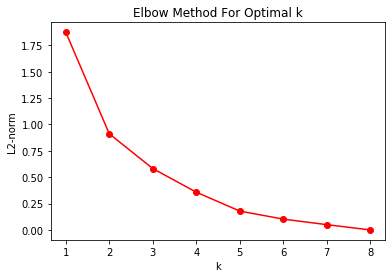

0.0

In [22]:
import matplotlib.pyplot as plt
def elbow(norm):
    plt.plot(K,norm, 'ro-')
    plt.xlabel('k')
    plt.ylabel('L2-norm')
    plt.title('Elbow Method For Optimal k')
    return plt.show()
elbow_curve=elbow(SSD)
elbow_curve
np.min(np.array(SSD))

In [23]:
elbow_N054=np.empty([8,2])
elbow_N054=pd.DataFrame(elbow_N054,columns=['K','SSD'])
elbow_N054['K']=K
elbow_N054['SSD']=SSD
elbow_N054.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/elbow_N054.xlsx')

Cluster Neighborhoods. Run k-means to cluster the neighborhood into 5 clusters.

In [24]:
# set number of clusters
kclusters = 5

In [25]:

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_neig_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_labels=kmeans.labels_
kmeans_labels


array([2, 0, 2, 3, 4, 0, 0, 1, 0], dtype=int32)

In [26]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
s_score=metrics.silhouette_score(London_neig_grouped_clustering,kmeans_labels, metric='euclidean')
s_score=pd.Series(s_score,index=[kclusters])

In [27]:
pp=pd.DataFrame(kmeans.labels_,columns=['Cluster Labels'])
kclusters_N054=pp['Cluster Labels'].value_counts().sort_index()
kclusters_N054=kclusters_N054.append(s_score)

Identify each neighbourhood with its Cluster Labels

In [28]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

London_neig_merged =pd.merge(neighbourhoods,neighbourhoods_venues_sorted, on='Neighbourhood').sort_values('Cluster Labels')

London_neig_merged.head() # check the last columns!

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barking and Dagenham,Rush Green,51.565500,0.176000,0,shops,food,travel,parks_outdoors,nightlife
3,Barking and Dagenham,Becontree,51.548700,0.142700,0,shops,travel,parks_outdoors,nightlife,food
7,Barking and Dagenham,Dagenham,51.539700,0.142200,0,shops,parks_outdoors,travel,nightlife,food
8,Barking and Dagenham,Creekmouth,51.516900,0.099100,0,shops,travel,parks_outdoors,nightlife,food
1,Barking and Dagenham,Marks Gate,51.586369,0.134848,1,shops,nightlife,travel,parks_outdoors,food


Finally, let's visualize the resulting clusters

In [29]:
address = 'London,UK'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

import random

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters

colors=get_colors(kclusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_neig_merged['Latitude'], London_neig_merged['Longitude'],
                                  London_neig_merged['Neighbourhood'], London_neig_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster-1],
        fill=True,
        #fill_colors=colors[cluster-1],
        fill_colors='white',
        fill_opacity=0.2).add_to(map_clusters)
       
map_clusters


In [30]:
map_clusters.save("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/map_London_bc05_CLUSTER_04.html")

Examine Clusters. Now, I can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, I will assign a name to each cluster.

In [31]:
    print ('CLuster 1: ')

 

CLuster 1: 


In [32]:
 London_neig_merged.loc[London_neig_merged['Cluster Labels']==0,:]
    
 

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barking and Dagenham,Rush Green,51.5655,0.1760,0,shops,food,travel,parks_outdoors,nightlife
3,Barking and Dagenham,Becontree,51.5487,0.1427,0,shops,travel,parks_outdoors,nightlife,food
7,Barking and Dagenham,Dagenham,51.5397,0.1422,0,shops,parks_outdoors,travel,nightlife,food
8,Barking and Dagenham,Creekmouth,51.5169,0.0991,0,shops,travel,parks_outdoors,nightlife,food


In [33]:
 print ('CLuster 2: ')

CLuster 2: 


In [34]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==1,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Barking and Dagenham,Marks Gate,51.586369,0.134848,1,shops,nightlife,travel,parks_outdoors,food


In [35]:
print ('Cluster 3: ')

Cluster 3: 


In [36]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==2,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Barking and Dagenham,Becontree Heath,51.563595,0.152614,2,shops,parks_outdoors,travel,food,building
4,Barking and Dagenham,Barking,51.540000,0.080000,2,shops,food,travel,parks_outdoors,nightlife


In [37]:
print('Cluster 4: ')

Cluster 4: 


In [38]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==3,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,Barking and Dagenham,Castle Green,51.533328,0.122395,3,arts_entertainment,parks_outdoors,nightlife,travel,shops


In [39]:
print('Cluster 5:')

Cluster 5:


In [40]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==4,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Barking and Dagenham,Chadwell Heath,51.5757,0.144,4,parks_outdoors,shops,nightlife,travel,food
6,Redbridge,Chadwell Heath,51.5757,0.144,4,parks_outdoors,shops,nightlife,travel,food


In [41]:
x=[]
y=[]
for ii in range(kclusters):
    x.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Latitude'].mean())
    y.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Longitude'].mean())
Centroids_N054=np.empty([kclusters,2])                                         
Centroids_N054=pd.DataFrame(Centroids_N054, columns=['x-Latitude','y-Longitude']) 
Centroids_N054['x-Latitude']=x
Centroids_N054['y-Longitude']=y
Centroids_N054.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Centroids_N054.xlsx')

In [42]:
Centroids_N054

,x-Latitude,y-Longitude
0,51.542700,0.140000
1,51.586369,0.134848
2,51.551797,0.116307
3,51.533328,0.122395
4,51.575700,0.144000


In [43]:
features=London_neig_grouped_clustering.columns.tolist()
# clustering purity 
score=pd.DataFrame(index=features,columns=range(kclusters))

for ii in range(kclusters):
           pp=London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:].\
                        groupby("1st Most Common Venue").count()['Neighbourhood']
           for nn in range(len(features)):
                try: 
                    score.loc[features[nn],ii]=pp.loc[features[nn]]
                except:
                    score.loc[features[nn],ii]=0
score

,0,1,2,3,4
arts_entertainment,0,0,0,1,0
building,0,0,0,0,0
education,0,0,0,0,0
event,0,0,0,0,0
food,0,0,0,0,0
nightlife,0,0,0,0,0
parks_outdoors,0,0,0,0,2
shops,4,1,2,0,0
travel,0,0,0,0,0


In [44]:
p_score=score.max().sum()/score.sum().sum()
p_score=pd.Series(p_score,index=[kclusters+1])
kclusters_N054=kclusters_N054.append(p_score)

In [45]:
kclusters_N054.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Kclusters_N054.xlsx')
kclusters_N054

0    4.000000
1    1.000000
2    2.000000
3    1.000000
4    1.000000
5    0.323202
6    1.000000
dtype: float64